# Statevector converter

## Overview

The Statevector converter enables seamless conversion of quantum states between different quantum computing frameworks:
- **Perceval**: Photonic quantum computing framework
- **Qiskit**: IBM's quantum computing toolkit
- **QuTiP**: Quantum Toolbox in Python

For a detailed example of working with quantum states in Perceval, you can read the "Graph_States_generation_and_display.ipynb" notebook from Perceval repository.

In [1]:
from perceval import Encoding, StateVector, StateGenerator
from perceval_interop import StatevectorConverter
from qiskit.visualization import plot_state_qsphere
from qutip import plot_schmidt

## Understanding Encoding Types

It is important to consider that *Qiskit* only implements Statevectors that represent n-qubits states. In order to do so  we propose a converter to make a StateVector from Perceval compatible with a Statevector from *Qiskit* that can be interpreted by `qsphere`. A state in dual rail encoding like $|0,1,0,1,0,0,0,1,0,0 \rangle$ from Perceval can't be directly interpreted by *Qiskit*.

Therefore, the type of encoding (*RAW, DUAL_RAIL, POLARIZATION...*) needs to be given to the converter and an optional parameter *ancillae* corresponding to the list of modes that we don't consider in the multi-qubits state.

In [2]:
# Initialize the converter with dual rail encoding
# This tells the converter how to interpret the photonic states
converter = StatevectorConverter(encoding=Encoding.DUAL_RAIL)

## Converting Perceval States to Qiskit

We can then use the converter to convert any state vector from *Perceval* to *Qiskit*. 

Let's create a superposition state representing 2 qubits in dual rail encoding:

In [3]:
# Create a 2-qubit superposition state using dual rail encoding
# Each logical qubit uses 2 modes: |0⟩ = |1,0⟩ and |1⟩ = |0,1⟩
# So for 2 qubits we need 4 modes total
state_vector = StateVector("|0,1,0,1>") + StateVector("|0,1,1,0>") + StateVector("|1,0,0,1>") + StateVector("|1,0,1,0>")

print("Original Perceval state:")
print(state_vector)

# Convert to Qiskit format
qiskit_sv = converter.to_qiskit(state_vector)
print(f"\nConverted Qiskit statevector:")
print(qiskit_sv)

Original Perceval state:
0.5*|1,0,1,0>+0.5*|1,0,0,1>+0.5*|0,1,1,0>+0.5*|0,1,0,1>

Converted Qiskit statevector:
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


`plot_state_qsphere` from *Qiskit* [[1]](#References) can be used for a graphical representation of the state.

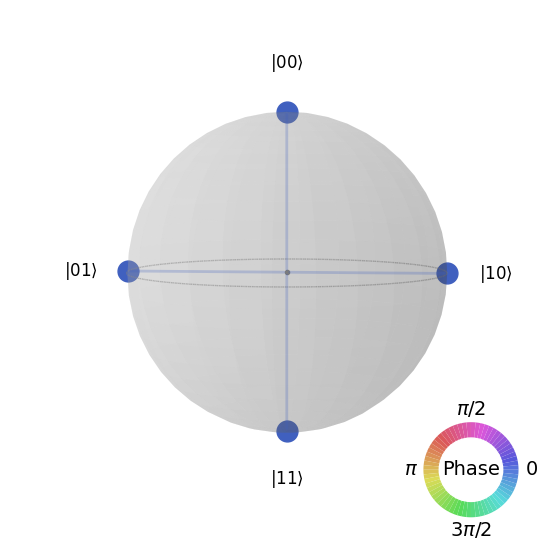

In [4]:
plot_state_qsphere(qiskit_sv)

## Bidirectional Conversion

After defining a converter, it is also possible to do the conversion the other way around using the `to_perceval` method.

Let's demonstrate both directions:

In [5]:
# Convert back from Qiskit to Perceval
pcvl_sv_restored = converter.to_perceval(qiskit_sv)

print("Restored Perceval state:")
print(pcvl_sv_restored)

# Verify the conversion is correct by comparing with original
print(f"\nOriginal and restored states are equivalent: {state_vector == pcvl_sv_restored}")

Restored Perceval state:
0.5*|0,1,0,1>+0.5*|0,1,1,0>+0.5*|1,0,0,1>+0.5*|1,0,1,0>

Original and restored states are equivalent: True


## QuTiP Integration

We also provide conversion to *QuTiP* (Quantum Toolbox in Python) with the same converter. QuTiP is a popular Python library for simulating open quantum systems. For instance, we can represent a Bell state $|\Psi^->$ in polarization encoding from *Perceval* with the function `plot_schmidt` from *qutip* [[2]](#References) :

In [6]:
# Bell state in Perceval
generator = StateGenerator(Encoding.POLARIZATION)
pcvl_bell = generator.bell_state("psi-")
print(pcvl_bell)

-0.707*|{P:V},{P:H}>+0.707*|{P:H},{P:V}>


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='last particles', ylabel='first particles'>)

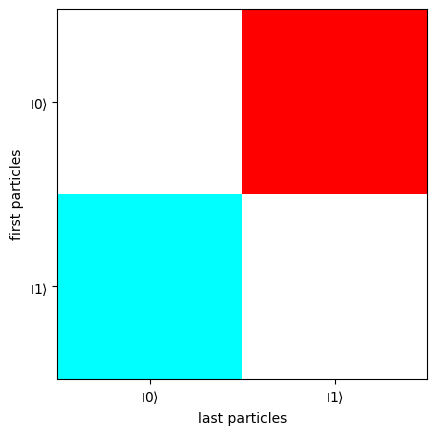

In [7]:
# Conversion
converter = StatevectorConverter(encoding=Encoding.POLARIZATION)
qutip_bell = converter.to_qutip(pcvl_bell)
# Plot
plot_schmidt(qutip_bell)

This plot function allows to have a better visualization of entanglement.

The `to_perceval` method is compatible with both *Qiskit* and *QuTiP* statevectors, making it easy to work across different quantum computing ecosystems.

In [8]:
# Comparing bidirectional conversion from Qutip
print("QuTiP statevector:")
print(qutip_bell)

# Convert back from QuTiP to Perceval
pcvl_from_qutip = converter.to_perceval(qutip_bell)
print(f"\nRound-trip conversion (QuTiP): {pcvl_bell == pcvl_from_qutip}")

QuTiP statevector:
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.        ]
 [ 0.70710678]
 [-0.70710678]
 [ 0.        ]]

Round-trip conversion (QuTiP): True


## Reference

<a id="1">[1]</a>
https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_qsphere.html

<a id="2">[2]</a>
https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v4/visualization/qubism-and-schmidt-plots.ipynb

